# Transfer function parameters identification (based on experimental data).

A dynamic system has been excited using a step on its input.

The system's output $y(t)$ has been logged; the logging started when the step was applied, so when $t=0$. The
recorded datas are available in the file "data_system_ok.npz".

One would like to approximate this dynamic system with a model build on a second order transfer function
having 2 real poles and a dead-time : $$H_m(s) = \frac{Ke^{-sT_m}}{(sT_1 + 1)(sT_2 + 1)}$$

with:
- $K$, the system's static gain
- $T_m$, the dead-time
- $T_1$ and $T_2$, the 2 time constants

You're asked to :
- Find the transfer function's parameters, ensuring its step answer would fit as good as possible to the
experimental data. (Remember the tutorial about optimization)
- Plot on one unique chart the experimental datas and the model's answer, using for this one 500 points
equally distributed on the time duration of the experimental data.
- Compute and plot the model's poles in the complex domain.

Solution :

- Optimized parameters of the model : $K = 0.87$, $T_m= 9.02 s$, $T_1= 26.11 s$, $T_2= 70.87 s$
- Model's poles : -0.0383 & -0.0141

![](./step_response_model_system.svg)

![](./pole_zero_map_2.svg)

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from scipy.optimize import minimize

%config InlineBackend.figure_formats = ['svg']

In [18]:
npzfile = np.load('data_system_ok.npz')
npzfile

NpzFile 'data_system_ok.npz' with keys: t, y

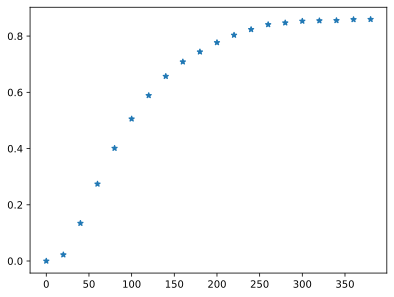

In [19]:
t = npzfile['t']
y = npzfile['y']
plt.plot(t, y, '*')
plt.show()

In [24]:
s, t_sym = sp.symbols('s, t')

def model(K, Tm, T1, T2):
    return K*sp.exp(-Tm*s) / ((T1*s + 1)*(T2*s + 1))

def response(K, Tm, T1, T2, t):
    H = model(K, Tm, T1, T2)
    Y = sp.inverse_laplace_transform(H/s, s, t_sym)
    Y_func = sp.lambdify(t_sym, Y, 'numpy')
    y_model = Y_func(t)
    return y_model

def cost(params):
    K, Tm, T1, T2 = params
    y_model = response(K, Tm, T1, T2, t)
    norm = np.linalg.norm(y - y_model)
    return norm

res = minimize(cost, [1, 25, 50, 50], method='Nelder-Mead')
P_opt = res.x
P_opt


array([ 0.8724019 ,  9.01496589, 70.84921164, 26.13125881])

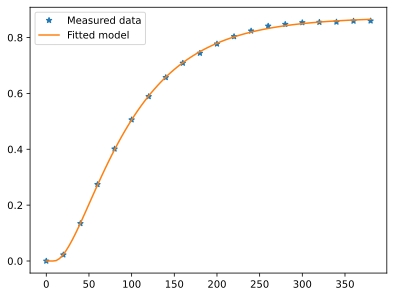

In [25]:
t2 = np.linspace(0, t[-1], 100)
y_model = response(P_opt[0], P_opt[1], P_opt[2], P_opt[3], t2)

plt.plot(t, y, '*', label='Measured data')
plt.plot(t2, y_model, '-', label='Fitted model')
plt.legend()
plt.show()

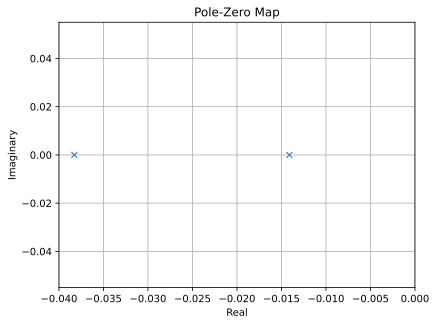

In [29]:
poles = [-1/P_opt[2], -1/P_opt[3]]  

plt.plot(np.real(poles), np.imag(poles), 'x')
plt.title('Pole-Zero Map')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid()
plt.xlim(-0.04, 0)
plt.show()